# 通路分析

在该教程, 我们尝试使用LLM 来在实际的数据背景下解释 GO 术语或者通路。

In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad("pbmc.h5ad")

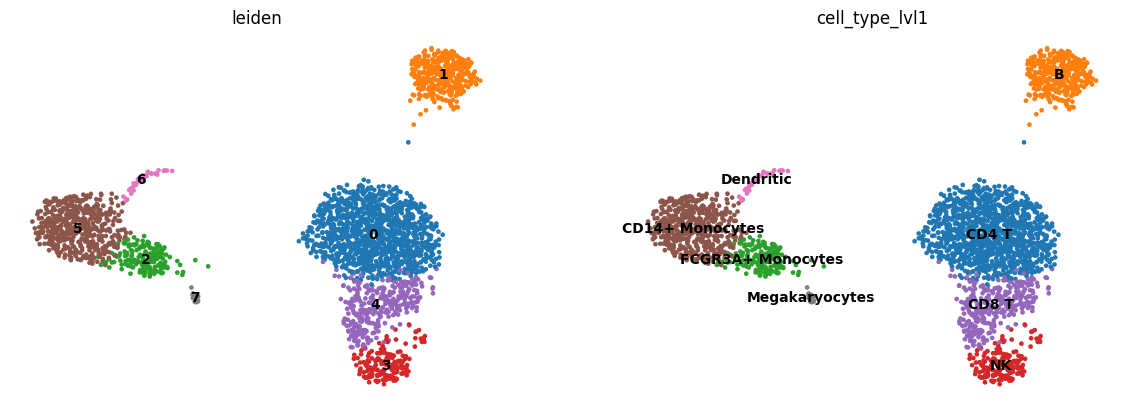

In [3]:
sc.pl.umap(adata, color=["leiden", "cell_type_lvl1"], legend_loc="on data", frameon=False)


In [4]:
celltype_dic = adata.obs.set_index('leiden')['cell_type_lvl1'].to_dict()
celltype_dic

{'0': 'CD4 T',
 '1': 'B',
 '2': 'FCGR3A+ Monocytes',
 '3': 'NK',
 '4': 'CD8 T',
 '5': 'CD14+ Monocytes',
 '6': 'Dendritic',
 '7': 'Megakaryocytes'}

In [5]:
deg_df = sc.get.rank_genes_groups_df(adata, None,key="logreg_deg")

In [6]:
import gseapy as gp

term_dic = {}
for gi,sdf in deg_df.groupby("group"):
    enr_bp = gp.enrichr(sdf["names"][:800].tolist(), gene_sets=['GO_Biological_Process_2023'], outdir=None)
    term_ls = enr_bp.res2d.loc[enr_bp.res2d["Adjusted P-value"]<0.05, "Term"].tolist()[:20]
    term_dic[gi] = term_ls

/tmp/ipykernel_3064281/1166100747.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for gi,sdf in deg_df.groupby("group"):


In [8]:
import gptbioinsightor as gbi 
### set API KEY
import os
os.environ['API_KEY'] = "sk-d8630ac28c4347109d941fb1f64884b6"

background = "Cells are PBMCs from a Healthy Donor."

## lang="zh" 返回中文，默认lang="en"英文
gbi.depict_pathway(term_dic, out="Pathway.zh.md", 
                   celltype_dic=celltype_dic, background=background,
                   provider="aliyun", model="qwen2-72b-instruct", lang="zh")

```
# Pathway summary
## 通路集合 0：

### 通路解释
- **细胞质翻译（GO:0002181）**: 这个过程涉及到在细胞质中，mRNA被核糖体读取并转化为蛋白质。在CD4 T细胞中，这可能与免疫反应的快速响应相关，因为T细胞需要迅速产生特定的蛋白质来应对病原体。
- **肽生物合成过程（GO:0043043）**: 这是蛋白质合成的一部分，涉及肽键的形成。在CD4 T细胞中，这可能与免疫反应相关的蛋白质的快速合成有关。
- **翻译（GO:0006412）**: 指的是mRNA信息被转化为蛋白质的过程，是基因表达的关键步骤。在CD4 T细胞中，高效的翻译机制对于细胞的免疫功能至关重要。
- **大分子生物合成过程（GO:0009059）**: 包括所有类型的生物大分子如蛋白质、核酸、脂质和多糖的合成。在CD4 T细胞中，这个过程支持了细胞的整体代谢和功能需求。
- **基因表达（GO:0010467）**: 是指从DNA信息到蛋白质产品的全过程，包括转录和翻译。在CD4 T细胞中，基因表达的调控确保了细胞对环境变化的适应性和免疫应答的有效性。
- **核糖体小亚基生物合成（GO:0042274）**: 涉及核糖体小亚基的组装，是核糖体功能的基础。在CD4 T细胞中，有效的核糖体生物合成对于维持蛋白质合成的速率至关重要。
- **核糖核蛋白复合物生物合成（GO:0022613）**: 指核糖体和其他RNA-蛋白质复合物的形成，这些复合物在蛋白质合成中起关键作用。在CD4 T细胞中，这些复合物的生物合成支持了细胞的蛋白质合成能力。
- **mRNA剪接，通过剪接体（GO:0000398）**: mRNA前体通过剪接体去除内含子，形成成熟的mRNA。在CD4 T细胞中，精确的mRNA剪接对于正确编码免疫相关蛋白是必要的。
- **RNA剪接，通过酯化反应与突出腺苷酸作为亲核试剂（GO:0000377）**: 描述了mRNA剪接的一种具体机制。在CD4 T细胞中，这种精确的剪接机制保证了mRNA的质量和功能。
- **mRNA处理（GO:0006397）**: 包括mRNA成熟的所有步骤，如剪接、加帽和聚腺苷酸化。在CD4 T细胞中，mRNA处理确保了最终翻译产物的准确性和稳定性。
- **核糖体生物合成（GO:0042254）**: 核糖体的整个组装过程，包括rRNA和蛋白质组分。在CD4 T细胞中，核糖体的高效生物合成是蛋白质合成速度的基础。
- **rRNA加工（GO:0006364）**: rRNA前体通过各种酶的作用被加工成成熟的rRNA。在CD4 T细胞中，rRNA的正确加工对于核糖体的功能和蛋白质合成效率至关重要。
- **核糖体装配（GO:0042255）**: 指rRNA和蛋白质组分结合形成功能性核糖体。在CD4 T细胞中，核糖体的正确装配是蛋白质合成速率的关键。
- **蛋白-RNA复合物装配（GO:0022618）**: 涉及蛋白和RNA结合形成复合物的过程。在CD4 T细胞中，这些复合物的形成对于蛋白质合成和RNA代谢至关重要。
- **rRNA代谢过程（GO:0016072）**: 包括rRNA的合成、加工和降解。在CD4 T细胞中，rRNA的代谢平衡对于维持核糖体功能和蛋白质合成速率是必要的。

### 总结
**综合分析**：考虑到背景上下文，即样本来源于健康供体的PBMCs，并且通路是从CD4 T细胞高表达基因中富集而来，上述通路集合逻辑清晰，生物学意义明确。
这些通路主要集中在蛋白质合成和RNA代谢上，这在免疫细胞如CD4 T细胞中尤为重要，因为它们需要快速响应病原体并产生相应的免疫分子。
此外，mRNA的处理和剪接过程的强调表明了细胞在精确控制蛋白质多样性方面的重要性，这对于适应不断变化的免疫挑战是必要的。
因此，可以提出一个连贯的生物学假设，即在CD4 T细胞中，高表达的基因和其相关的通路（如蛋白质合成和RNA代谢）共同构成了一个高度动态和精确调节的系统，
以支持免疫应答的快速启动和有效执行。
```